In [ ]:
from google.colab import files
uploaded = files.upload()


for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle
!cp "kaggle (4).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle (4).json to kaggle (4).json
User uploaded file "kaggle (4).json" with length 66 bytes


In [ ]:
import os
os.rename("kaggle (4).json", "kaggle.json")


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d borhanitrash/alzheimer-mri-disease-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/borhanitrash/alzheimer-mri-disease-classification-dataset
License(s): apache-2.0
 96% 25.0M/26.0M [00:02<00:00, 17.5MB/s]
100% 26.0M/26.0M [00:02<00:00, 11.3MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/alzheimer-mri-disease-classification-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!unzip /content/alzheimer-mri-disease-classification-dataset.zip -d /content/alzheimer-mri-disease-classification-dataset

Archive:  /content/alzheimer-mri-disease-classification-dataset.zip
  inflating: /content/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/test-00000-of-00001-44110b9df98c5585.parquet  
  inflating: /content/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/train-00000-of-00001-c08a401c53fe5312.parquet  
  inflating: /content/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/README.md  


In [ ]:
import os
os.path.exists('/content/alzheimer-mri-disease-classification-dataset')

True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import cv2
from PIL import Image
import io
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf




In [ ]:
import os
file_path = "/content/alzheimer-mri-disease-classification-dataset"
name_class = os.listdir(file_path)
name_class

['Alzheimer MRI Disease Classification Dataset']

In [ ]:
train = "/content/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/train-00000-of-00001-c08a401c53fe5312.parquet"
test =  "/content/alzheimer-mri-disease-classification-dataset/Alzheimer MRI Disease Classification Dataset/Data/test-00000-of-00001-44110b9df98c5585.parquet"
categories = {0 :"Mild_Demented",1:"Moderate_Demented",2:"Non_Demented",3:"Very_Mild_Demented"}
data_train = pd.read_parquet(train)
data_test = pd.read_parquet(test)

In [ ]:
data_train.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


In [ ]:
data_test.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


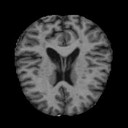

In [ ]:
img_dict = data_train["image"][0]
byte_string = img_dict["bytes"]
nparr = np.frombuffer(byte_string,np.uint8)
img = cv2.imdecode(nparr,cv2.IMREAD_GRAYSCALE)
img = Image.open(io.BytesIO(byte_string))
display(img)

In [ ]:
def extraccion_y_transformacion(images_set):
  et_list_images = []
  images_bytes = images_set["image"]
  for  imag_dict in images_bytes:
    bytes_string = img_dict["bytes"]
    nparr = np.frombuffer(bytes_string,np.uint8)
    img = cv2.imdecode(nparr,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(224,224))
    et_list_images.append(img)
  return et_list_images














In [ ]:
train_transformado = extraccion_y_transformacion(data_train)
test_transformado = extraccion_y_transformacion(data_test)
print(train_transformado[:1])

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]


In [ ]:
print(type(data_train))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(data_train.columns)


Index(['image', 'label'], dtype='object')


In [ ]:
print(data_train.head())
print(categories)


                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      2
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      2
{0: 'Mild_Demented', 1: 'Moderate_Demented', 2: 'Non_Demented', 3: 'Very_Mild_Demented'}


In [ ]:
print(ZipFile)


<class 'zipfile.ZipFile'>


In [ ]:
print(type(data_train))



<class 'pandas.core.frame.DataFrame'>


In [ ]:
def visualizer_imagenes(image_set, categories, limit=5):
    import matplotlib.pyplot as plt
    from PIL import Image
    import io

    # Ensure limit does not exceed number of available images
    limit = min(limit, len(image_set))

    fig, axes = plt.subplots(1, limit, figsize=(15, 5))

    for i, ax in enumerate(axes[:limit]):
        row = image_set.iloc[i]  # Access rows using iloc for simplicity
        image_dict = row["image"]
        label = row["label"]
        name = categories[label]

        # Decode the image bytes
        byte_string = image_dict["bytes"]
        image = Image.open(io.BytesIO(byte_string))

        ax.imshow(image, cmap="gray")
        ax.set_title(name)
        ax.axis("off")

    plt.tight_layout()
    plt.show()



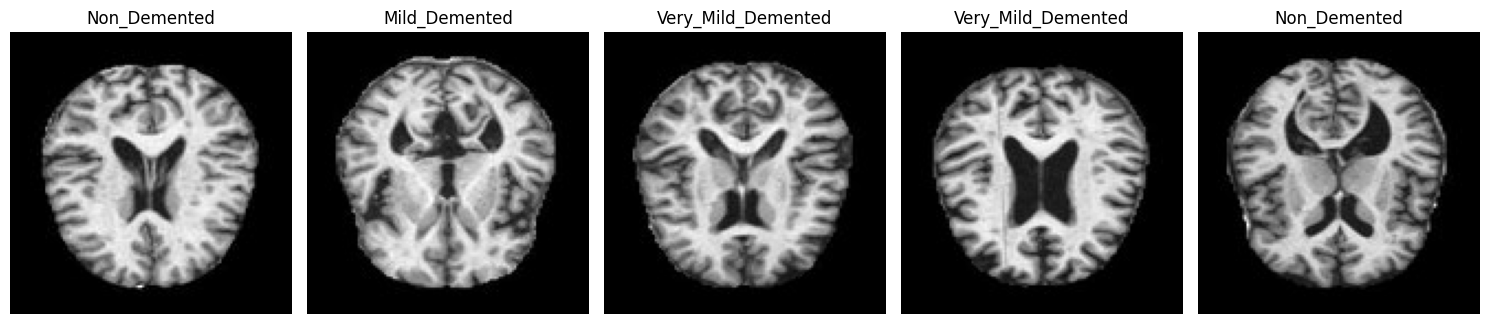

In [ ]:
visualizer_imagenes(data_train,categories,limit = 5)

In [ ]:
counts = data_train.label.value_counts()
counts

,count
label,
2,2566
3,1781
0,724
1,49


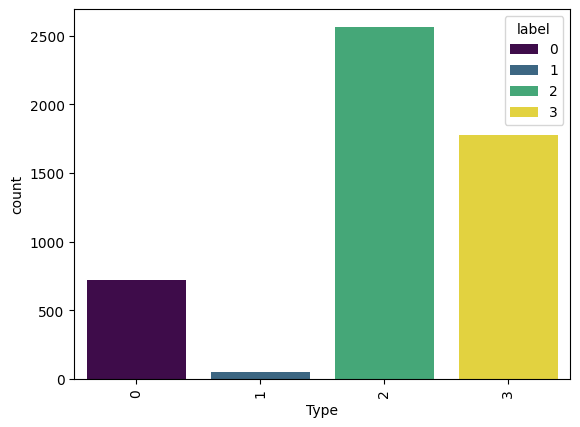

In [ ]:
counts = data_train.label.value_counts()

sns.barplot(x = counts.index,y = counts, hue= counts.index, palette = "viridis")
plt.xlabel("Type")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
counts = data_test.label.value_counts()
counts

,count
label,
2,634
3,459
0,172
1,15


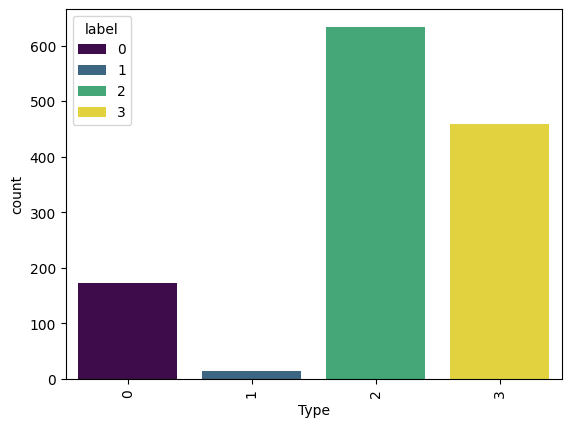

In [ ]:
counts = data_test.label.value_counts()

sns.barplot(x = counts.index,y = counts, hue= counts.index, palette = "viridis")
plt.xlabel("Type")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
y_test = []
for label in data_test["label"]:
  y_test.append(label)
y_train = []
for label in data_train["label"]:
  y_train.append(label)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
##"We perform a one-hot encoding for the label variable."
y_train = tf.one_hot(y_train.astype(np.int32),depth = 4)
y_test = tf.one_hot(y_test.astype(np.int32),depth = 4)
y_train

<tf.Tensor: shape=(5120, 4), dtype=float32, numpy=
array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

In [ ]:
train_transformado = np.array(train_transformado)/255
test_transformado = np.array(test_transformado)/255

In [ ]:
##standardization
train_transformado = [np.expand_dims(img,axis=1)for img in train_transformado]
test_transformado = [np.expand_dims(img,axis=1)for img in test_transformado]
train_transformado= np.array(train_transformado)
test_transformado= np.array(test_transformado)
train_transformado[0].shape

(224, 1, 224)

In [ ]:
train_transformado.shape

(5120, 224, 1, 224)

In [ ]:
class MinMaxScaler3D(MinMaxScaler):
  def fit_transform(self,X,y=None):
    x = np.reshape(X,newshape =(X.shape[0]*X.shape[1],X.shape[2]))
    return np.reshape(super().fit_transform(x,y=y),newshape = X.shape)

scaler = MinMaxScaler3D()
train_scaled = [scaler.fit_transform(X= img)for img in train_transformado]
train_scaled = np.array(train_scaled)
test_scaled = [scaler.fit_transform(X= img)for img in test_transformado]
test_scaled = np.array(test_scaled)


In [ ]:
train_scaled.shape

(5120, 224, 1, 224)

In [ ]:
test_scaled.shape

(1280, 224, 1, 224)

In [ ]:
import numpy as np


# Correctly transpose train_scaled
train_scaled = np.transpose(train_scaled, (0, 2, 3, 1))

# Fix the syntax for test_scaled
test_scaled = np.transpose(test_scaled, (0, 2, 3, 1))  # Use square brackets, not parentheses


In [ ]:
## reshape the input directly:
train_scaled = train_scaled.reshape(-1,224,224,1)
test_scaled = test_scaled.reshape(-1,224,224,1)

In [ ]:
## make a model with help of keras
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Sequential,initializers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

In [ ]:
print(y_train)

tf.Tensor(
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]], shape=(5120, 4), dtype=float32)


In [ ]:
print(type(y_train))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
print(f" y_train shape:{y_train.shape}")

 y_train shape:(5120, 4)


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 1)),  # Assuming grayscale input
    layers.Conv2D(64, kernel_size=(2, 2), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),  # Flatten before Dense layers
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4, activation="softmax")  # Output layer with 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.995):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
history = model.fit(
    train_scaled,
    y_train,
    batch_size=10,
    epochs=50,
    validation_split=0.1,
    callbacks=[callbacks]
)



Epoch 1/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.4569 - loss: 1.1677 - val_accuracy: 0.5020 - val_loss: 1.0237
Epoch 2/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.5010 - loss: 1.0521 - val_accuracy: 0.5020 - val_loss: 1.0227
Epoch 3/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.4871 - loss: 1.0659 - val_accuracy: 0.5020 - val_loss: 1.0231
Epoch 4/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.4922 - loss: 1.0448 - val_accuracy: 0.5020 - val_loss: 1.0218
Epoch 5/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.4909 - loss: 1.0460 - val_accuracy: 0.5020 - val_loss: 1.0224
Epoch 6/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5068 - loss: 1.0496 - val_accuracy: 0.5020 - val_loss: 1.0277
Epoch 7/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5003 - loss: 1.0655 - val_accuracy: 0.5020 - val_loss: 1.0217
Epoch 8/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.4996 - loss: 1.0430 - 

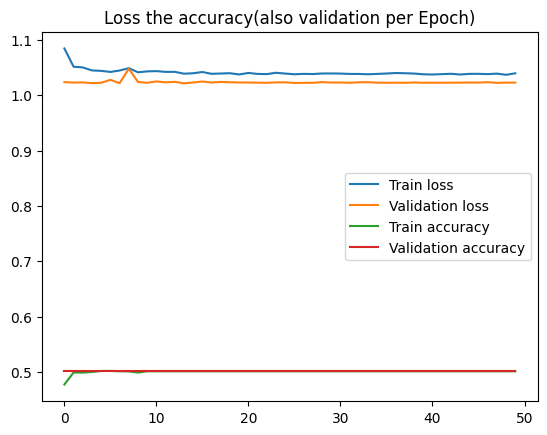

In [ ]:
plt.plot(history.history["loss"],label = "Train loss")
plt.plot(history.history["val_loss"],label = "Validation loss")
plt.plot(history.history["accuracy"],label = "Train accuracy")
plt.plot(history.history["val_accuracy"],label = "Validation accuracy")
plt.legend()
plt.title("Loss the accuracy(also validation per Epoch)")
plt.show()


In [ ]:
history.model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [ ]:
w,b = history.model.layers[0].get_weights()

In [ ]:
b.shape

(64,)

In [ ]:
## Evaluate the accuracy of the model:
test_loss,test_accuracy = model.evaluate(test_scaled,y_test,verbose =2)
print(f"Test accuracy: {test_accuracy:.4f}")

40/40 - 2s - 48ms/step - accuracy: 0.4953 - loss: 1.0378
Test accuracy: 0.4953


In [ ]:
predictions = model.predict(test_scaled)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [ ]:
predictions[0]

array([0.13612004, 0.01094668, 0.50296676, 0.34996656], dtype=float32)

In [ ]:
np.argmax(predictions[0])

2

In [ ]:
data_test["label"][0]

3

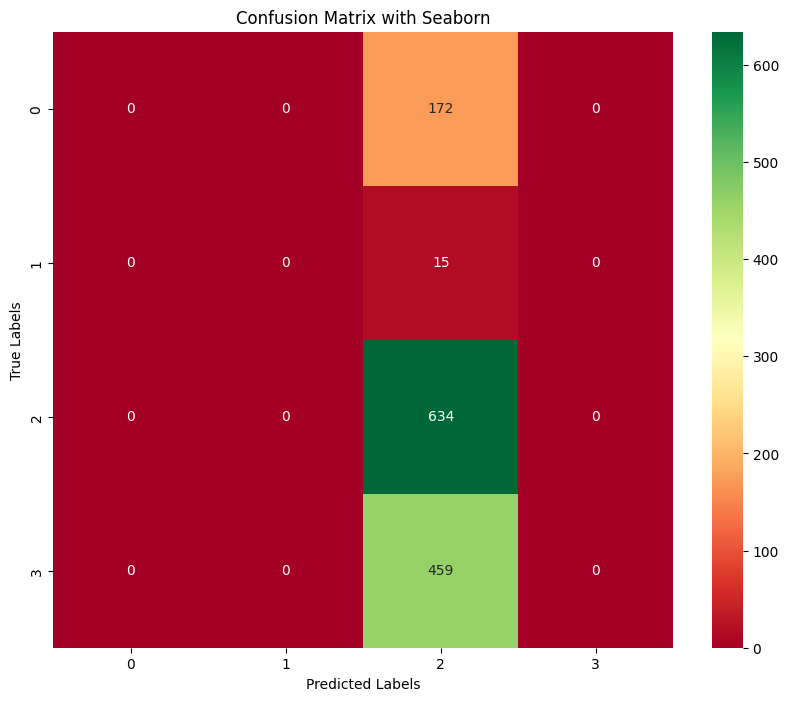

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
predicted_class =np.argmax(predictions,axis =1)
true_class = np.argmax(y_test,axis =1)

cm = confusion_matrix(true_class,predicted_class)
plt.figure(figsize = (10,8))
sns.heatmap(cm,annot = True,fmt = "d",cmap = "RdYlGn")
plt.title("Confusion Matrix with Seaborn")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report
predicted_class =np.argmax(predictions,axis =1)
true_class = np.argmax(y_test,axis =1)
report = classification_report(true_class,predicted_class)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.00      0.00      0.00        15
           2       0.50      1.00      0.66       634
           3       0.00      0.00      0.00       459

    accuracy                           0.50      1280
   macro avg       0.12      0.25      0.17      1280
weighted avg       0.25      0.50      0.33      1280



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def plot_image(i, predictions_array, truth_label, img):
    plt.imshow(img[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)  # Get the predicted label
    color = 'blue' if predicted_label == truth_label else 'red'
    plt.xlabel("{}: {:.2f}% ({})".format(
        categories[predicted_label],  # predicted label
        100 * np.max(predictions_array),  # prediction confidence
        categories[truth_label]  # true label
    ), color=color)  # Pass the color variable here






def plot_value_array(i,predictions_array,truth_label):
  predictions_array,truth_label = predictions_array,truth_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4),predictions_array,color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color("red")
  thisplot[truth_label].set_color("blue")






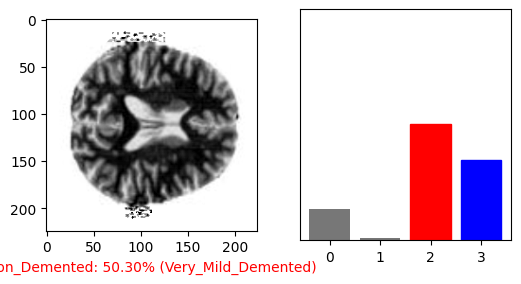

In [ ]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], np.argmax(y_test, axis=1)[i], test_scaled)

plt.subplot(1,2,2)
plot_value_array(i,predictions[i],np.argmax(y_test,axis=1))
plt.show()

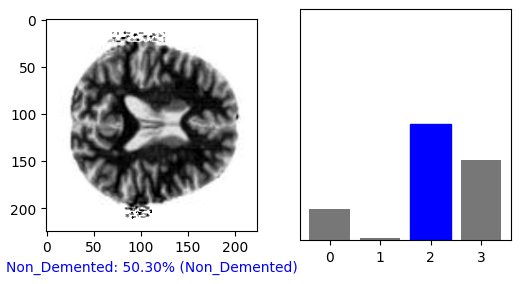

In [ ]:
i = 8
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], np.argmax(y_test, axis=1)[i], test_scaled)

plt.subplot(1,2,2)
plot_value_array(i,predictions[i],np.argmax(y_test,axis=1))
plt.show()

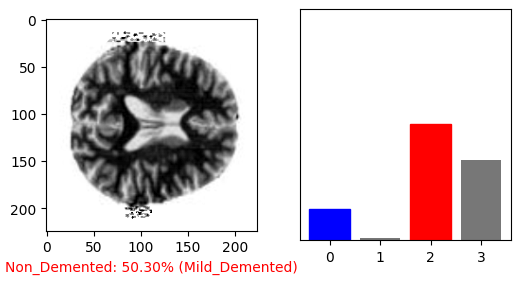

In [ ]:
i = 4
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], np.argmax(y_test, axis=1)[i], test_scaled)

plt.subplot(1,2,2)
plot_value_array(i,predictions[i],np.argmax(y_test,axis=1))
plt.show()

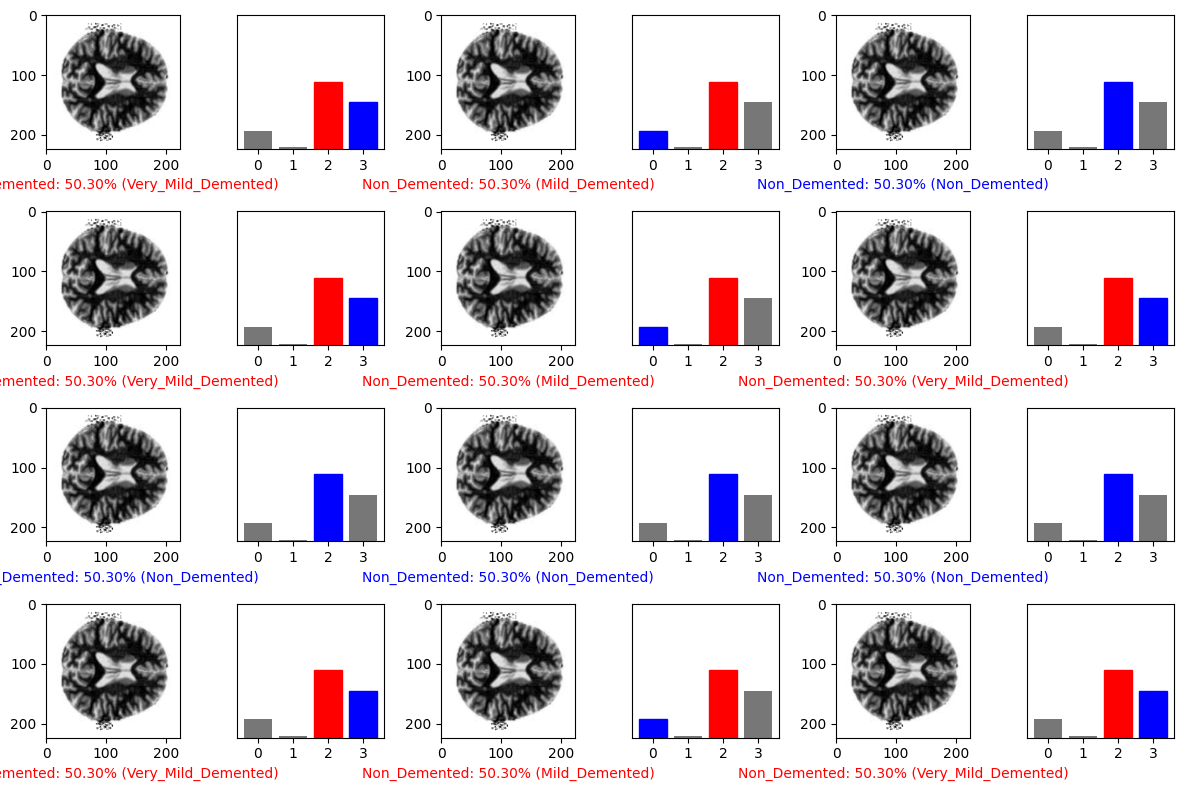

In [ ]:





def plot_image(i, predictions_array, truth_label, img):
    plt.imshow(img[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)  # Get the predicted label
    color = 'blue' if predicted_label == truth_label[i] else 'red'  # Compare with the truth label for image i
    plt.xlabel("{}: {:.2f}% ({})".format(
        categories[predicted_label],  # predicted label
        100 * np.max(predictions_array),  # prediction confidence
        categories[truth_label[i]]  # true label for the specific image
    ), color=color)  # Pass the color variable here

num_rows = 4
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], np.argmax(y_test, axis=1), test_scaled)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], np.argmax(y_test, axis=1))

plt.tight_layout()
plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the plot directly to Google Drive
plt.savefig("/content/drive/My Drive/predictions_plot.png")


Mounted at /content/drive


<Figure size 640x480 with 0 Axes>